***Dataset is about the most occuring features that are the base to predict price of used cards in japan ,source of this data is tc-v.com ,we are going to build a ML algorithm to predict price***

In [143]:
##Importing necessary Libraries###
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [144]:
###Importing Dataset####
df = pd.read_csv('Japan_used_cars_datasets.csv')
df

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...,...
2313,2331,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,2332,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,2333,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,2334,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


***Observations***

1. id column is looking connected as Dataset is small.

2. price is continuous feature and will be treated as target feature as we are predicting the same

3. mark is the name of the company since it is in string we will check for unique values,if possible we will encode the same.

4. model is the name of the car which has been produced by the company in mark feature they may be highly correllated we will check the same through visualization

5. mileage is the total miles run on road of cars

6. engine_capacity defines the cc/power car holds in the engine

7. transmission is having string values,we will check the unique values for same and will encode the same

8. wheeldrive is the add on on wheels that is to be checked and encoded

9. hand_drive indicated LHT and RHT i.e. Left hand traffic and Right hand traffic

10. Fuel is the type of fuel or any other source used in the car

In [145]:
##Checking shape of data set
df.shape

(2318, 11)

In [146]:
###Checking columnwise the presence of Null values###
df.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

***Checking duplicates values***

In [147]:
dup_check=pd.DataFrame(df.duplicated(subset=None,keep='first'))
for i in dup_check:
    if i == True:
        print("Their are Duplicate Values")
    else:
        print("Their are no Duplicates values in your Data ")

Their are no Duplicates values in your Data 


***I have created a DataFrame and by using for loop i have confirmed that their are no duplicate values in our Dataset as this code will give the value in Boolean i.e. True/False***

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


*** id column is of no use as we already have built-in indexing facility ,we are dropping this unnecessary column to avoid unecessary data learning***

In [149]:
df['mark'].nunique()

28

***Their are 28 unique values here in this feature we will check the correllation before dropping out this feature as encoding will produce many columns which will give learning affect on our Algorithm***

In [150]:
df['model'].nunique()

258

***Their are 258 unique values here in this feature we will check the correllation before dropping out this feature as encoding will produce many columns which will give learning affect on our Algorithm***

***Lets plot Heatmap to check the initial features correllation to seggregate their importance,post this we will encode the rest required features for their analysis***

<AxesSubplot:>

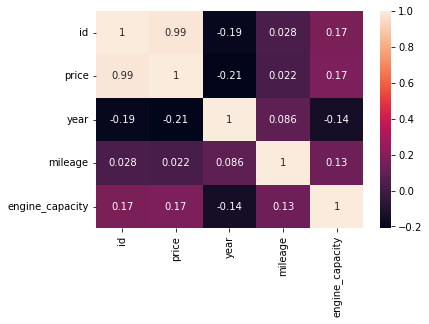

In [151]:
##Plotting heatmap to check initial correllation###

sns.heatmap(df.corr(),annot=True)

Observations====>

1. Year is the feature showing negative correllation with Price from initial features

2. Engine_capacity is showing the maximum correllation with our target whereas mileage showing very less correllation with our target.

***Lets encode columns to recheck our correlation***

In [152]:
df['drive'].unique()

array(['2wd', '4wd', 'awd'], dtype=object)

***We are encoding this keeping in mind the value that 4wd gets the higher value as in realistic cars market their are price differences in models in relation with this feature****

***Source - Google***

In [153]:
df_2=df['drive'].replace({'2wd':0,'4wd':1,'awd':2})
df['drive']=df_2
df.head(1)

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,0,rhd,gasoline


<AxesSubplot:>

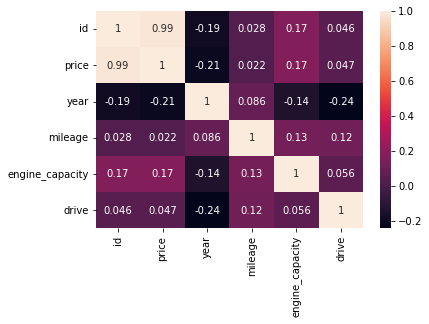

In [154]:
sns.heatmap(df.corr(),annot=True)

***We can clearly see that drive feature even has more correlation as i compare it with mileage feature for our target variable***

In [155]:
df['transmission'].unique()


array(['at', 'mt', 'cvt'], dtype=object)

In [156]:
df_1=df['transmission'].replace({'at':0,'mt':1,'cvt':2})
df['transmission']=df_1

<AxesSubplot:>

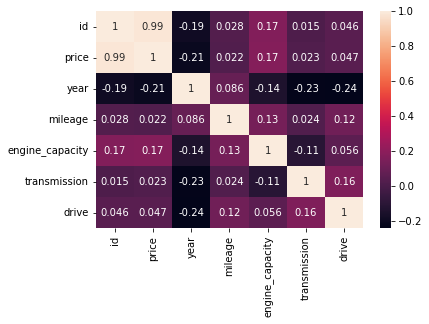

In [157]:
sns.heatmap(df.corr(),annot=True)

***We can clearly see that transmission feature is also positively correlated with our target***

***Checking unique Values***

In [158]:
df['hand_drive'].unique()

array(['rhd', 'center', 'lhd'], dtype=object)

In [159]:
df['fuel'].unique()

array(['gasoline', 'diesel', 'hybrid', 'lpg', 'cng'], dtype=object)

***Encoding of values***

In [160]:
df['fuel'].replace({'gasoline':0,'diesel':1,'hybrid':2,'lpg':3,'cng':4},inplace=True)

In [161]:
df['hand_drive'].replace({'rhd':0,'center':1,'lhd':2},inplace=True)

***Recheck of Correlation***

<AxesSubplot:>

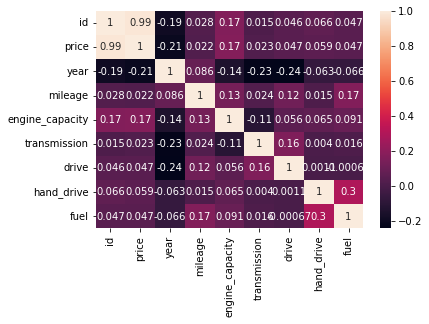

In [162]:
sns.heatmap(df.corr(),annot=True)

***we are going to drop year column as it is negatively correlated with our target***

In [163]:
df.drop(columns=['year'],inplace=True)

# Bivariate Analysis

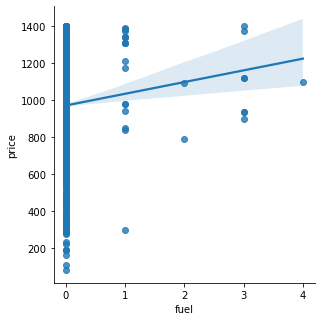

In [164]:
sns.pairplot(x_vars='fuel',y_vars='price',data=df,kind='reg',height=4.5)

***fuel is not the most demading feature when calculating the price of used car ,we are going to drop this feature***

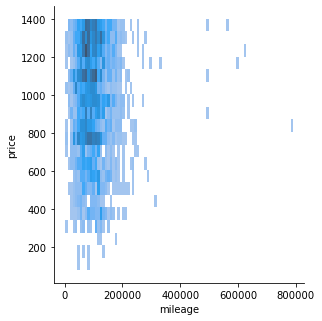

In [165]:
sns.pairplot(x_vars='mileage',y_vars='price',data=df,kind='hist',height=4.5)

***As when with used cars having copious run on road price for same car is in dimnishing mode,it gives a sense that people prefer used cars having less run on the roads which is realistic also***
***Their is also a sense of outliers in mileage lets check the same***

<AxesSubplot:xlabel='mileage'>

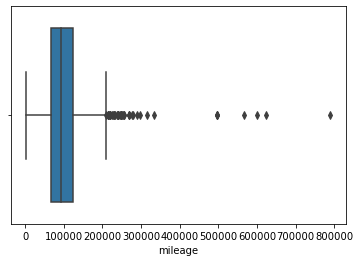

In [166]:
sns.boxplot(x='mileage',data=df)

***Clear view of Outliers present in mileage,we will handle the outliers***

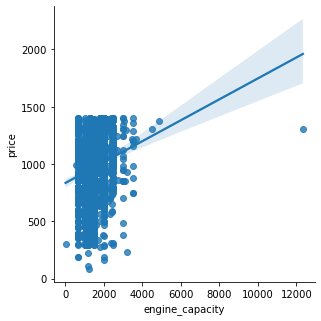

In [167]:
sns.pairplot(x_vars='engine_capacity',y_vars='price',data=df,kind='reg',height=4.5)

***Engine capacity is  prime feature for calculating the price of used cars as with the increase in engine_capacity their is a increase in price of used cars***

***Lets check for outliers in engine_capacity***

<AxesSubplot:xlabel='engine_capacity'>

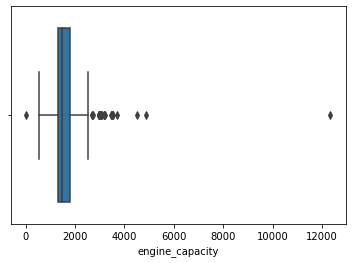

In [168]:
sns.boxplot(x='engine_capacity',data=df)

***Outliers are present in engine_capacity,we have documented the same and will remove outliers for this column alongwith mileage feature***

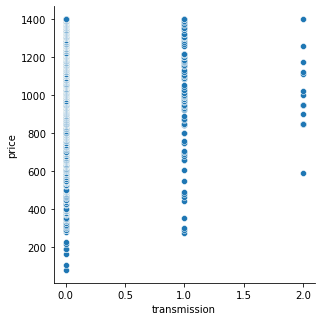

In [169]:
sns.pairplot(x_vars='transmission',y_vars='price',data=df,kind='scatter',height=4.5)

***transmission 'at' mode cars are having maximum price wherein in 'mt' mode is also a preferable choice,'cvt' mode is least considered as compared to 'at' and 'mt'***

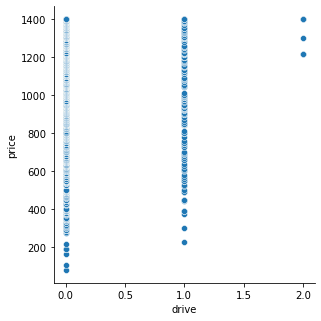

In [170]:
sns.pairplot(x_vars='drive',y_vars='price',data=df,kind='scatter',height=4.5)

***drive feature '2wd'and '4wd' has the maximum impact in calculating price ,herein as it is categorical we will not go for outliers check***

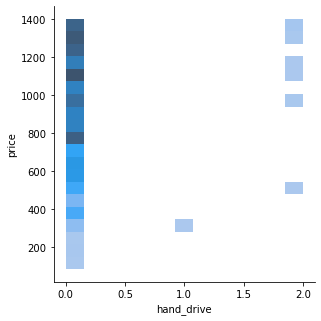

In [171]:
sns.pairplot(x_vars='hand_drive',y_vars='price',data=df,kind='hist',height=4.5)

***Cars having RHD has the maximum impact on predicting price as compared to LHD***

***As model feature is having 258 unique values which are going to create multiple columns if we use any encoder and will make cocundrum ML algorithm while training and testing ,we are dropping this column***

In [172]:
df.drop(columns=['model'],inplace=True)

In [173]:
df.head(1)

,id,price,mark,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,80000,1240,0,0,0,0


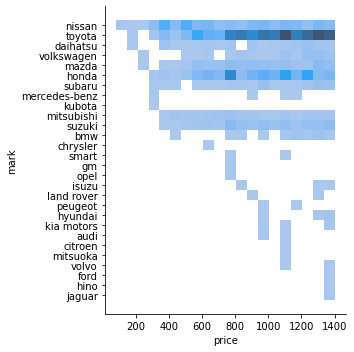

In [174]:
sns.displot(y='mark',x='price',data=df)

***Their are some companies having cars in every price segment wherein maximum companies are not showing any particular relationship with their respective cars segments,this feature is having 28 unique values which is hard to keep after this analysis,we are going to drop this feature***

In [175]:
df.drop(columns=['mark'],inplace=True)

***Checking the correlation of features with our target variable for final selection of features***

<AxesSubplot:>

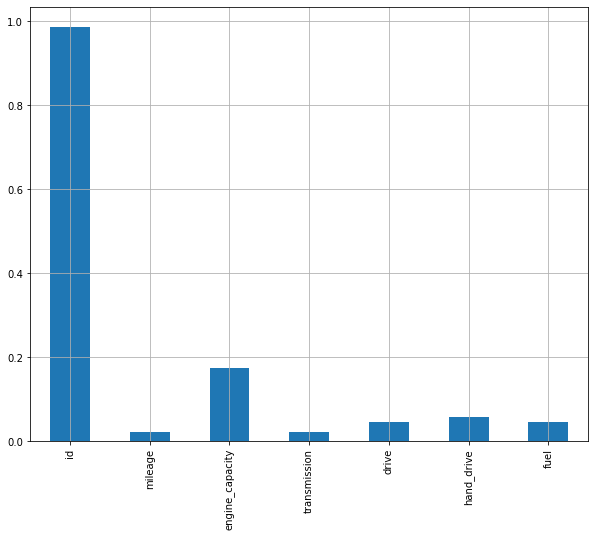

In [176]:
df.drop('price',axis=1).corrwith(df.price).plot(kind='bar',grid=True,figsize=(10,8))

**We can clearly see fuel feature is also negatively correlated ,pre this check we also plotted pair plot and their also it has shown that this feature is whatsoever not contributing to our target,hence we are dropping the same**

***Id is the highest contributing feature as this is showing the relation maybe with names or models identifications***

<AxesSubplot:>

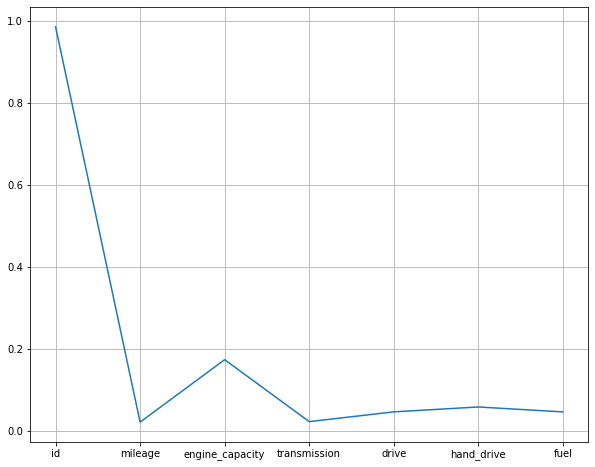

In [177]:
df.drop('price',axis=1).corrwith(df.price).plot(kind='line',grid=True,figsize=(10,8))

***Checking the correlation again by using line plot and satisfied with the outcome as it is showing all selected features are correlated with our target variable***

1. Mileage and engine_capacity is considered as the best features in calculating the price of used cars.

2. Transmission is having the least effect while calculating the price of used cars

3. drive feature impacts positively on the way of calculating price.

4. hand_drive is more impactful as compared to wheel drive while calculating the price


In [178]:
df.head(1)

,id,price,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,80000,1240,0,0,0,0


# Checking for Skewness in Univariate Analysis

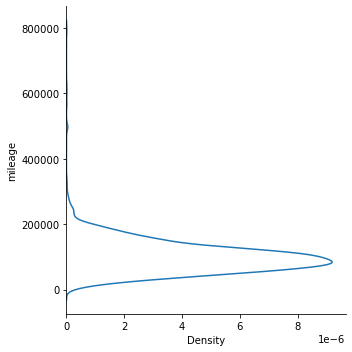

In [179]:
sns.displot(y='mileage',data=df,kind='kde')

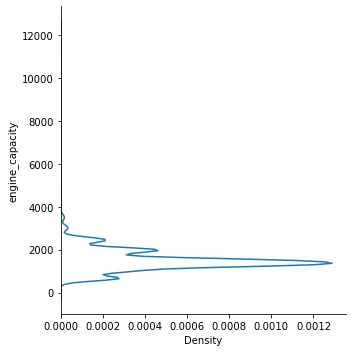

In [180]:
sns.displot(y='engine_capacity',data=df,kind='kde')

***Mileage and engine_capacity showing data is normally skewed for both of the continuous features***


# Removing outliers

***We have visualized outliers in mileage and engine_capacity***

In [181]:
##Checking shape of dataset before removing outliers###
df.shape

(2318, 8)

In [182]:
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR = Q3-Q1

In [183]:
MI_high =(Q3.mileage+(1.5*IQR.mileage))
index=np.where(df['mileage']>MI_high)
df= df.drop(df.index[index])
df.reset_index()

,index,id,price,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,0,80,80000,1240,0,0,0,0
1,1,1,110,53000,1200,0,0,0,0
2,2,2,165,47690,2000,0,0,0,0
3,3,3,190,130661,1990,0,0,0,0
4,4,4,190,66300,660,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2267,2313,2331,1400,121000,996,0,0,0,0
2268,2314,2332,1400,101000,3000,0,0,0,0
2269,2315,2333,1400,101000,660,2,0,0,0
2270,2316,2334,1400,170000,660,0,1,0,0


In [184]:
e_high = (Q3.engine_capacity+(1.5*IQR.engine_capacity))
index = np.where(df['engine_capacity']>e_high)
df=df.drop(df.index[index])
df.reset_index()

,index,id,price,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,0,80,80000,1240,0,0,0,0
1,1,1,110,53000,1200,0,0,0,0
2,2,2,165,47690,2000,0,0,0,0
3,3,3,190,130661,1990,0,0,0,0
4,4,4,190,66300,660,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2227,2311,2329,1400,101874,2000,0,0,0,0
2228,2312,2330,1400,112000,1300,0,0,0,0
2229,2313,2331,1400,121000,996,0,0,0,0
2230,2315,2333,1400,101000,660,2,0,0,0


In [185]:
##Calculating the percentage Loss after removing outliers####
86/2318*100

3.710094909404659

***Percentage loss is acceptable***

***Lets recheck the features after removing outliers***

<AxesSubplot:xlabel='mileage'>

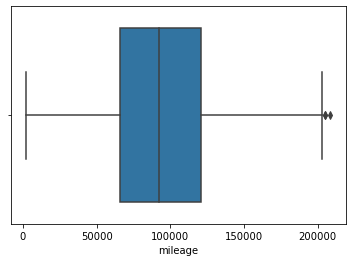

In [186]:
sns.boxplot(x='mileage',data=df)

***As compared with initial checks on outliers for mileage we can cleary isualize that outliers are in controll***

<AxesSubplot:xlabel='engine_capacity'>

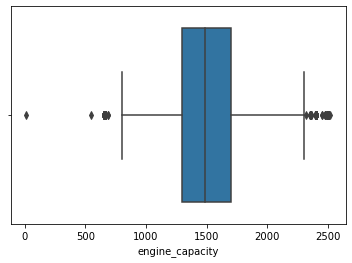

In [187]:
sns.boxplot(x='engine_capacity',data=df)

# We can see outliers on lower side is still pending to be treated,Lets treat them

In [188]:
eng_low = (Q1.engine_capacity-(1.5*IQR.engine_capacity))
index = np.where(df['engine_capacity']<eng_low)
df=df.drop(df.index[index])
df.reset_index()

,index,id,price,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,0,80,80000,1240,0,0,0,0
1,1,1,110,53000,1200,0,0,0,0
2,2,2,165,47690,2000,0,0,0,0
3,3,3,190,130661,1990,0,0,0,0
4,4,4,190,66300,660,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2226,2311,2329,1400,101874,2000,0,0,0,0
2227,2312,2330,1400,112000,1300,0,0,0,0
2228,2313,2331,1400,121000,996,0,0,0,0
2229,2315,2333,1400,101000,660,2,0,0,0


# New percentage Loss

In [189]:
print("New Percentage Loss on Dataset is=",87/2318*100)

New Percentage Loss on Dataset is= 3.7532355478861086


***Only one row was inculcate with the outliers which is good for us ,we have not loose much of information***

In [190]:
print("Difference between Pre and Post Percentage Loss of data",1/2232*100)

Difference between Pre and Post Percentage Loss of data 0.044802867383512544


***Lets plot Boxplot again to check the outliers***

<AxesSubplot:xlabel='engine_capacity'>

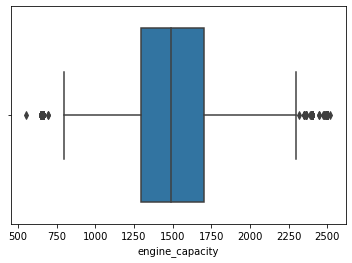

In [191]:
sns.boxplot(x='engine_capacity',data=df)

# We can visualize that outliers are in complete controll for our DataSet

***Multi-Collinearity Check***

<AxesSubplot:>

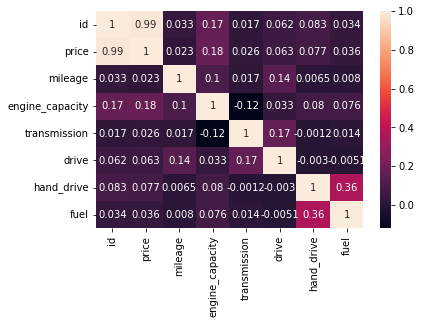

In [192]:
sns.heatmap(df.corr(),annot=True)

***Observations***

1. Considering minimum threshold of 80% ,by visualizing their is no muli-collinearity problem in dataset.
2. Both continuous features are negatively correlated with each other

***No Multicollinearity has been visualized amongst features***

# Skewness Check

In [193]:
Data_skewness=pd.DataFrame({'Skewness':df.skew().sort_values()})
Data_skewness

,Skewness
price,-0.465917
id,-0.001479
mileage,0.384964
engine_capacity,0.396519
drive,3.343349
transmission,4.425486
hand_drive,12.512952
fuel,15.696206


***we can not touc the price column as this our target variable drive,transmission and hand_drive are categorical features,whereas mileage and engine_capacity is in threshold of +-0.65***

***For continuous variables Univariate analysis has been visualized above and was found satisfactory***

***Dividing datset for checking Relationship of all features vs our target variable 

In [194]:
x= df.drop(columns=['price'])
y= df['price']

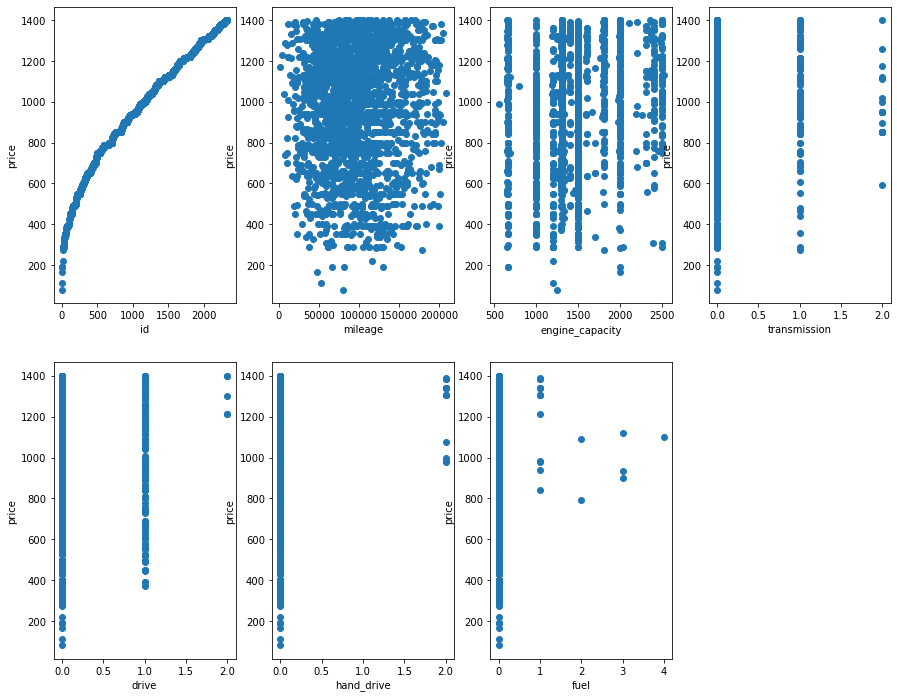

In [195]:
plt.figure(figsize=(15,12))

Plotnumber=1
for column in x:
    if Plotnumber<=8:
        ax=plt.subplot(2,4,Plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plt.ylabel('price')
    Plotnumber+=1
    
plt.show()    

***OBSERVATIONS***

1. More the mileage less the Price of used car wheas less the mileage more the price of used car

2. engine_capacity plays a significant role with increase in engine_capacity their is a increase in price and vice-versa

3. Automatic transmission cars have the maximum price followed by 'mt' and 'cvt'

4. Their are almost equal prices of 2wd, 4wd and awd for used cards

5. Right hand drive is having the maximum price in used cars as compared to Centre and Left hand drive

In [196]:
##Importing necessary Libraries####
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [197]:
###Initiating object for standard scaler#####
scaler = StandardScaler()

In [198]:
x_scaled= scaler.fit_transform(x)

In [199]:
#Applying train_test_split for training and testing of data#####
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.33,random_state=21)

# Linear Regression ML Algorithm

In [200]:
LR = LinearRegression()

In [201]:
###Model learning on training Data#####
LR.fit(x_train,y_train)

LinearRegression()

In [202]:
LR.fit(x_test,y_test)

LinearRegression()

# Training score

In [203]:
LR.score(x_train,y_train)

0.9709670637118263

# Testing score

In [204]:
LR.score(x_test,y_test)

0.9702650402737746

# Metric Score

In [205]:
from sklearn.metrics import r2_score

In [206]:
y_pred = LR.predict(x_test)
r2_score(y_test,y_pred)

0.9702650402737746

# Linear regression scores

# ***Training score == 97%
# ***Testing score   == 97%
# *** R2_Score         == 97%
      

# we got 97% of score in all above segments,which is a good sign. Lets try LASSO and RIDGE Regressions to check whether model is overfitted or not¶

In [207]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [208]:
C

In [209]:
Lassocv.fit(x_train,y_train)

LassoCV(max_iter=200, normalize=True)

In [210]:
alpha_num = Lassocv.alpha_
alpha_num

0.007423805334367752

In [211]:
lasso_reg = Lasso(alpha_num)

In [212]:
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.007423805334367752)

In [213]:
lasso_reg.score(x_train,y_train)

0.9713075966579852

In [214]:
lasso_reg.score(x_test,y_test)

0.9699119536387071

# Lasso Regression  score is also 97%,our Model is not overfitting

# ***Lets check overall error of Model using MAE,MSE,RMSE

In [215]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [216]:
mean_absolute_error(y_test,y_pred)

35.64106659698825

In [217]:
mean_squared_error(y_test,y_pred)

2356.810477381663

In [218]:
##Root mean squared error
np.sqrt(2356.810477381663)

48.54699246484444

***MAE-35.64***

***MSE-2356.81***

***RMSE-48.54***

# Model Building using ADA Boost Regressor

In [219]:
from sklearn.ensemble import AdaBoostRegressor

In [220]:
###Initiating object for AdaBoostRegressor###
ada= AdaBoostRegressor()

In [221]:
###Model Training using Ada Boost Regressor###
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [222]:
####Training score####
ada.score(x_train,y_train)

0.9948597779747117

In [223]:
ada.fit(x_test,y_test)

AdaBoostRegressor()

In [224]:
###Testing Score###
ada.score(x_test,y_test)

0.9962422440541182

In [225]:
###Predicting values in x_train for comparing with y_train###
x_pred= ada.predict(x_train)

In [226]:
####R2 score on Training Data using AdaBoost Regressor###
r2_score(y_train,x_pred)

0.9957815550238768

In [227]:
##Predicting values in x-test for comparing with y_test### 
y_pred = ada.predict(x_test)

In [228]:
###Testing score using Ada Boost Regressor#####
r2_score(y_test,y_pred)

0.9962422440541182

*****Scores with ADA Boost Regressor*****

**Taining score= 99%**

**Testing score= 99%**


**R2_score on Training data = 99%**

***R2_score on Testing data = 99%**

# Evaluation Metrics

In [229]:
mean_absolute_error(y_test,y_pred)

13.12788838641641

In [230]:
mean_squared_error(y_test,y_pred)

297.8419566139969

In [231]:
print("Root mean squared error===",np.sqrt(349.6375685481564))

Root mean squared error=== 18.698598036969415


**MAE == 14.84**

**MSE == 349.63**

**RMSE == 18.69**

# CV Score

In [232]:

from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [233]:
Lassocv=LassoCV(max_iter=200,normalize=True)

In [234]:
Lassocv.fit(x_train,y_train)

LassoCV(max_iter=200, normalize=True)

In [235]:
alpha_num = Lassocv.alpha_
alpha_num

0.007423805334367752

In [236]:
lasso_reg = Lasso(alpha_num)

In [237]:
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.007423805334367752)

In [238]:
lasso_reg.score(x_train,y_train)

0.9713075966579852

In [239]:
lasso_reg.score(x_test,y_test)

0.9699119536387071

***CV Score***

***Training=97%***

***Testing Score === 96%***

# Model building using KNN Regressor

In [240]:
##Importing necessary Library####
from sklearn.neighbors import KNeighborsRegressor

In [241]:
##Creating object for algorithm####
Knn=KNeighborsRegressor()

In [242]:
##Model training###
Knn.fit(x_train,y_train)

KNeighborsRegressor()

In [243]:
print("Training score is====",Knn.score(x_train,y_train))

Training score is==== 0.978134272764862


In [244]:
print("Testing score is =====",Knn.score(x_test,y_test))

Testing score is ===== 0.955725159222153


In [245]:
y_pred= Knn.predict(x_test)

In [246]:
r2_score(y_test,y_pred)

0.955725159222153

***Training Score = 97%***

***Testing score = 95%***

***R2_Score =  95%***

# Calculating MAE,MSE,RSME for KNN algorithm

In [247]:
print("Mean Absolute Error is=====",mean_absolute_error(y_test,y_pred))

Mean Absolute Error is===== 32.17693351424695


In [248]:
print("Mean Squared Error is====",mean_squared_error(y_test,y_pred))

Mean Squared Error is==== 3509.2500407055636


In [249]:
print("Root mean squared error===",np.sqrt(3509.2500407055636))

Root mean squared error=== 59.23892335876441


# Cross Validations

In [250]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [251]:
Lassocv=LassoCV(max_iter=200,normalize=True)

In [252]:
Lassocv.fit(x_train,y_train)

LassoCV(max_iter=200, normalize=True)

In [253]:
alpha_num = Lassocv.alpha_
alpha_num

0.007423805334367752

In [254]:
lasso_reg = Lasso(alpha_num)

In [255]:
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.007423805334367752)

In [256]:
lasso_reg.score(x_train,y_train)

0.9713075966579852

In [257]:
lasso_reg.score(x_test,y_test)

0.9699119536387071

***KNN CV Scores***

***CV Score on Training = 97%***

***CV Score on Testing = 96.99%***

# Model building GradientBoostingRegressor

In [258]:
from sklearn.ensemble import GradientBoostingRegressor

In [259]:
from sklearn import metrics

In [260]:
gbr = GradientBoostingRegressor()

In [261]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [262]:
print("Training score is======",gbr.score(x_train,y_train))

Training score is====== 0.999984848592543


In [263]:
print("Testing score is =====",gbr.score(x_test,y_test))

Testing score is ===== 0.9999376049386273


In [264]:
y_predict = gbr.predict(x_test)

***R2_Score***

In [265]:
print("R2_Score is",metrics.r2_score(y_test,y_predict))

R2_Score is 0.9999376049386273


***Evaluation metrics score***

In [266]:
##Printing all evaluation score for GradientBoostingRegressor####
print("Mean Absolute Error is=====",mean_absolute_error(y_test,y_predict))
print("Mean squared error is======",mean_squared_error(y_test,y_predict))
print("Root mean squared error===",np.sqrt(4.947803732532297))

Mean Absolute Error is===== 1.077177009771877
Mean squared error is====== 4.945469431743573
Root mean squared error=== 2.2243659169597745


# Cross validation

In [267]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [268]:
Lassocv=LassoCV(max_iter=200,normalize=True)

In [269]:
Lassocv.fit(x_train,y_train)

LassoCV(max_iter=200, normalize=True)

In [270]:
alpha_num = Lassocv.alpha_
alpha_num

0.007423805334367752

In [271]:
lasso_reg = Lasso(alpha_num)

In [272]:
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.007423805334367752)

In [273]:
lasso_reg.score(x_train,y_train)

0.9713075966579852

In [274]:
lasso_reg.score(x_test,y_test)

0.9699119536387071

***According to Model accuracy and CV score Linear Regression is having the least difference***

# Hyperparameter Tuning of Leniar Regression

In [275]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [276]:
LinearRegression()

LinearRegression()

In [277]:
params ={'fit_intercept':['True','False'],
        'positive':['True','False'],
        'copy_X':['True','False'],
        'n_jobs':[1,2,3,4]}

In [278]:
rndn_search = RandomizedSearchCV(LinearRegression(),cv=5,param_distributions=params)

In [279]:
rndn_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': ['True', 'False'],
                                        'fit_intercept': ['True', 'False'],
                                        'n_jobs': [1, 2, 3, 4],
                                        'positive': ['True', 'False']})

In [280]:
rndn_search.best_estimator_

LinearRegression(copy_X='False', fit_intercept='False', n_jobs=2,
                 positive='True')

In [281]:
LR = LinearRegression(copy_X='True',fit_intercept='False',n_jobs=4,positive='False')
LR.fit(x_train,y_train)

LinearRegression(copy_X='True', fit_intercept='False', n_jobs=4,
                 positive='False')

In [282]:
y_predict = LR.predict(x_test)

In [283]:
print("===========Score post Hyper Parameter Tuning is==========")

metrics.r2_score(y_test,y_predict)

===========Score post Hyper Parameter Tuning is==========


0.9698335211144827

# After Hyperparameter Tuning its almost 97%,Lets save final model

In [284]:
import pickle

In [285]:
pickle.dump(LR,open('Japan_used_cars','wb'))

# Model Completed##